In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

Primero, agarro la inversa de distrib exponencial que tenía de la guía 2 y simulo las 50 mediciones

In [ ]:
def pdf(x,l):
    pdf = np.exp(-x*l)*l
    return pdf

def cdf(x,l):
    cdf = 1-np.exp(-x*l)
    return cdf

def inv(y,l):
    inv = -np.log(1-y)/l
    return inv

y=np.random.rand(50)
x=inv(y,5)

plt.hist(x,bins=50,density=True)
plt.xlabel('x')
plt.ylabel('Frecuencia')
plt.title('Distribución exponencial')
plt.show()


El valor de máximo likelihood para estimar lambda es: 4.951605882919947


$L =\prod_{i=1}^N \lambda e^{-\lambda x_i} $ 

$\log{L}=N\log{\lambda}-\lambda \sum_{i=1}^N x_i$

$\lambda=\frac{1}{\overline{x}}$

In [82]:
maxlikelihood = 1/np.mean(x)

print('El valor de máximo likelihood para estimar lambda es:',maxlikelihood)

El valor de máximo likelihood para estimar lambda es: 4.951605882919947


In [83]:
bordeinferr	= 3
bordesuperr	= 7

lambda_estimador = np.linspace(1, 10, 100)

def loglikelihood(x, l):
    L = np.sum(np.log(pdf(x, l)))
    return L

def priors(p):
	if bordeinferr <= p and p <= bordesuperr:
		return 0
	else:
		return -np.inf

def post(x, l):
    prior_prob = priors(l)
    return loglikelihood(x, l) + prior_prob

posterior	= np.zeros(len(lambda_estimador))
for i in range(len(lambda_estimador)):
				posterior[i] = post(x, lambda_estimador[i])

lambda_bayesiano =	lambda_estimador[np.argmax(posterior)]

print(posterior)
print('El valor de lambda que maximiza el posterior es:',lambda_bayesiano)


[       -inf        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf 24.63741188 25.2120842
 25.74348521 26.23405322 26.68602609 27.10146261 27.4822611  27.83017566
 28.14683046 28.4337322  28.69228124 28.92378131 29.12944827 29.31041777
 29.4677522  29.60244682 29.71543535 29.80759488 29.87975041 29.93267886
 29.96711278 29.98374359 29.98322469 29.96617413 29.93317715 29.88478845
 29.82153428 29.74391437 29.65240363 29.54745384 29.42949507 29.29893708
 29.15617057 29.00156834 28.83548638 28.65826483 28.47022897 28.27169001
 28.06294592 27.84428218 27.61597246 27.37827922 27.1314544  26.87573991
 26.61136815        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf    

In [84]:
delta_frec = abs(5-maxlikelihood)
delta_bayes =	abs(5-lambda_bayesiano)

print(delta_bayes)
print(delta_frec)

porcen_frec	= (delta_frec/5)*100
porcen_bayes = (delta_bayes/5)*100

print('El error porcentual para el estimador frecuentista es:',porcen_frec)
print('El error porcentual para el estimador bayesiano es:',porcen_bayes)


0.09090909090909083
0.048394117080053256
El error porcentual para el estimador frecuentista es: 0.9678823416010651
El error porcentual para el estimador bayesiano es: 1.8181818181818168


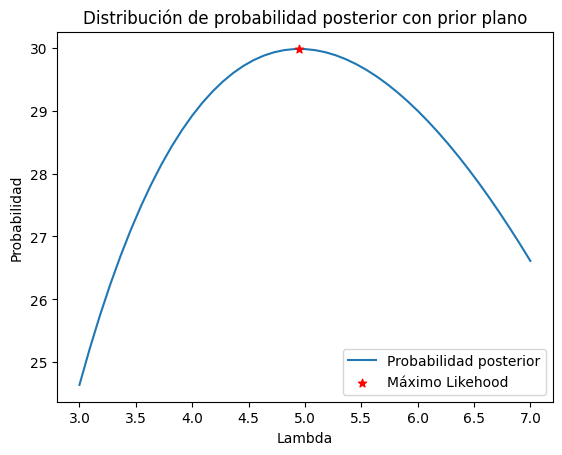

In [85]:
post_maxl= post(x, maxlikelihood)

plt.plot(lambda_estimador, posterior, label='Probabilidad posterior')
plt.scatter(maxlikelihood, post_maxl, label='Máximo Likehood', color='red', marker='*', zorder=5)
plt.xlabel('Lambda')
plt.ylabel('Probabilidad')
plt.title('Distribución de probabilidad posterior con prior plano')
plt.legend()
plt.show()



Fluctua mucho, hagamos varias tiradas.

In [41]:
experimento = 10000

maxlikelihood_lista = np.zeros(experimento)
lambda_bayesiano_lista = np.zeros(experimento)

for j in range(experimento):

	y=np.random.rand(50)
	x=inv(y,5)

	maxlikelihood = 1/np.mean(x)
	maxlikelihood_lista[j] = maxlikelihood

	for i in range(len(lambda_estimador)):
					posterior[i] = post(x, lambda_estimador[i])

	lambda_bayesiano =	lambda_estimador[np.argmax(posterior)]
	lambda_bayesiano_lista[j] = lambda_bayesiano

frec_medio	= np.mean(maxlikelihood_lista)
bayes_medio	= np.mean(lambda_bayesiano_lista)

print('El valor medio del estimador frecuentista es:',frec_medio)
print('El valor medio del estimador bayesiano es:',bayes_medio)

delta_frec_lista	= abs(5-frec_medio)
delta_bayes_lista = abs(5-bayes_medio)
porcen_frec_lista	= (delta_frec_lista/5)*100
porcen_bayes_lista = (delta_bayes_lista/5)*100

print('Lambda frecuentista medio',frec_medio)
print('Lambda bayesiano medio',bayes_medio)
print('Error porcentual medio frecuentista',porcen_frec_lista)
print('Error porcentual medio bayesiano',porcen_bayes_lista)

El valor medio del estimador frecuentista es: 5.099540088697635
El valor medio del estimador bayesiano es: 5.093490909090909
Lambda frecuentista medio 5.099540088697635
Lambda bayesiano medio 5.093490909090909
Error porcentual medio frecuentista 1.990801773952704
Error porcentual medio bayesiano 1.8698181818181856
